In [ ]:
"""
Machine Learning Homework 4
Done by:
Mariana Santana 106992
Pedro Leal 106154
LEIC-A
"""

#### II. Programming and critical analysis
#### In the next exercise you will use the accounts.csv dataset. This dataset contains account details of bank clients, and the target variable y is binary (‘has the client subscribed a term deposit?’). 


In [8]:
"""
General imports and variables for all exercises; run this cell before any other
"""
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('accounts.csv')

X = df.drop(columns='deposit')
y = df['deposit']

#### 1) [4v] Select the first 8 features and remove duplicates and null values. Normalize the data using MinMaxScaler. Using sklearn, apply k-means clustering (without targets) on the normalized data with k= {2,3,4,5,6,7,8}. Apply k-means randomly initialized, using max_iter = 500 and random_state = 42. Plot the different sum of squared errors (SSE) using the _inertia attribute of k-means according to the number of clusters. Hint: You can use get_dummies() to change the feature type from categorical to numerical (e.g. pd.get_dummies(data, drop_first=True)). 

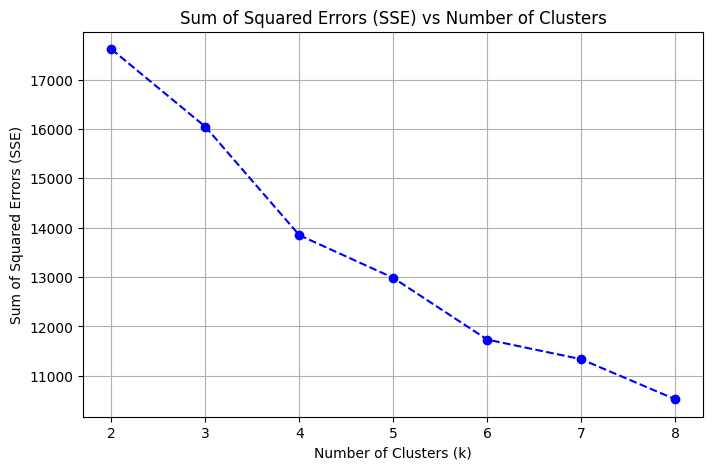

In [9]:
df_selected = df.iloc[:, :8]

df_selected = df_selected.drop_duplicates()
df_selected = df_selected.dropna()

df_dummies = pd.get_dummies(df_selected, drop_first=True)

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_dummies)

sse = []

k_values = [2, 3, 4, 5, 6, 7, 8]
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='--', color='b')
plt.title('Sum of Squared Errors (SSE) vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### 2) [1.5v] According to the previous plot, how many underlying customer segments (clusters) should there be ? Explain based on the trade off between the clusters and inertia. 


According to the plot, the Sum of Squared Errors (SSE) (or inertia) as a function of the number of clusters 
𝑘
k in a K-Means clustering model. To determine the optimal number of clusters, we typically use the elbow method, which identifies the point where increasing the number of clusters results in a diminishing reduction of the SSE.

Explanation of the "Elbow Method":
The SSE generally decreases as the number of clusters 
𝑘
k increases, because the points are closer to the centroids in smaller clusters.
The "elbow" point is where the SSE reduction begins to slow down significantly, meaning that adding more clusters beyond this point does not improve the clustering much. This point suggests the optimal number of clusters, balancing model complexity and goodness of fit.
Interpretation of the Plot:
The SSE decreases significantly from 
𝑘
=
2
k=2 to 
𝑘
=
4
k=4, suggesting that splitting the data into 2 to 4 clusters improves the model significantly.
After 
𝑘
=
4
k=4, the reduction in SSE becomes less pronounced (i.e., the slope of the curve flattens).
Based on this observation, the elbow seems to occur around 4 clusters. This indicates that 4 underlying customer segments might be a reasonable choice, as adding more clusters beyond this point leads to diminishing returns in terms of SSE reduction.

Conclusion:
The optimal number of clusters based on this plot is likely 4, as this is where the trade-off between the number of clusters and inertia (SSE) starts to balance. Increasing beyond 4 clusters doesn't improve the model significantly and may lead to overfitting.

#### 3) [1.5v] Would k-modes be a better clustering approach ? Explain why based on the dataset features. 

#### 4) [2v] Apply PCA to the data :
#### a. Use StandardScaler to scale the data before you apply fit_transform. How much variability is explained by the top 2 components ?

#### b. Provide a scatterplot according to the first 2 principal components and color the points according to k=3 clusters. Can we clearly separate the clusters ? Justify.

#### 5) [2v] Plot the cluster conditional features of the frequencies of “job” and ”education” according to k-means, with multiple="dodge", stat='density', shrink=0.8, common_norm=False. Analyze the frequency plots using sns.displot, (see Data Exploration notebook). Describe the main differences between the clusters in no more than half page. 
